<a href="https://colab.research.google.com/github/Boyraci41/Neural-Network/blob/master/Text_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
vocab_size = 10000
embedding_dim = 16
max_lenght =100
trunc_type = "post"
padding_type = "post"
oov_tok = "<OOV>"
training_size = 20000


In [24]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-06-21 21:15:35--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-06-21 21:15:35 (109 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [25]:
with open("/tmp/sarcasm.json", 'r') as f:
  datastore = json.load(f)
sentences = []
labels = []

for item in datastore:
  sentences.append(item["headline"])
  labels.append(item["is_sarcastic"])

In [26]:
training_senteces = sentences[:training_size]
testing_senteces = sentences[training_size:]
training_labels = labels[:training_size]
testing_labels = labels[training_size:]


In [34]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_senteces)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_senteces)
training_padded = pad_sequences(training_sequences,maxlen=max_lenght,padding=padding_type,truncating= trunc_type)


testing_sequences = tokenizer.texts_to_sequences(testing_senteces)
testing_padded = pad_sequences(testing_sequences, maxlen=max_lenght, padding=padding_type, truncating=trunc_type)


In [35]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [37]:
model = tf.keras.Sequential([
                            tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_lenght),
                            tf.keras.layers.GlobalAveragePooling1D(),
                            tf.keras.layers.Dense(24,activation="relu"),
                            tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss = "binary_crossentropy",optimizer="adam",metrics =["accuracy"])


In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [39]:
num_epochs = 30
history = model.fit(training_padded,training_labels,epochs = num_epochs,validation_data=(testing_padded,testing_labels),verbose =2)

Epoch 1/30
625/625 - 2s - loss: 0.6644 - accuracy: 0.5925 - val_loss: 0.5722 - val_accuracy: 0.7482
Epoch 2/30
625/625 - 2s - loss: 0.4240 - accuracy: 0.8352 - val_loss: 0.3857 - val_accuracy: 0.8346
Epoch 3/30
625/625 - 2s - loss: 0.3058 - accuracy: 0.8795 - val_loss: 0.3493 - val_accuracy: 0.8541
Epoch 4/30
625/625 - 2s - loss: 0.2553 - accuracy: 0.8995 - val_loss: 0.3417 - val_accuracy: 0.8550
Epoch 5/30
625/625 - 2s - loss: 0.2217 - accuracy: 0.9144 - val_loss: 0.3413 - val_accuracy: 0.8565
Epoch 6/30
625/625 - 2s - loss: 0.1958 - accuracy: 0.9237 - val_loss: 0.3501 - val_accuracy: 0.8559
Epoch 7/30
625/625 - 2s - loss: 0.1735 - accuracy: 0.9344 - val_loss: 0.3609 - val_accuracy: 0.8527
Epoch 8/30
625/625 - 2s - loss: 0.1552 - accuracy: 0.9428 - val_loss: 0.3730 - val_accuracy: 0.8547
Epoch 9/30
625/625 - 2s - loss: 0.1406 - accuracy: 0.9488 - val_loss: 0.4066 - val_accuracy: 0.8420
Epoch 10/30
625/625 - 2s - loss: 0.1279 - accuracy: 0.9545 - val_loss: 0.4371 - val_accuracy: 0.8401

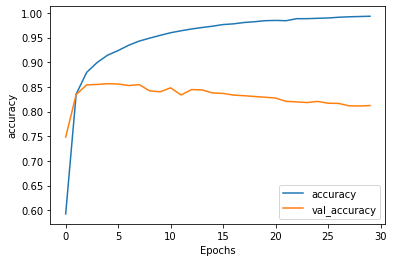

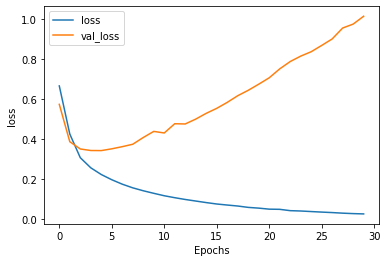

In [40]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [43]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
equences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_lenght, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[1.8467009e-02]
 [4.7465343e-02]
 [9.4253683e-01]
 [6.3607486e-06]]
